In [410]:
import pandas as pd
import re
import matplotlib.pyplot as plt

### EU Data


In [411]:
# https://digital-decade-desi.digital-strategy.ec.europa.eu/datasets/desi-2022/indicators
# https://digital-decade-desi.digital-strategy.ec.europa.eu/datasets/desi/indicators
# definitions of aggregates: https://digital-strategy.ec.europa.eu/en/policies/desi

filename_map = {'At least basic digital skills':'desi_1a2-data.csv',
                'Above basic digital skills':'desi_1a3-data.csv',
                'At least basic digital skills (hist)': 'i_dsk_bab-data.csv',
                'Above basic digital skills (hist)': 'i_dsk_ab-data.csv',
                'Broadband coverage': 'desi_fbbc-data.csv',
                'Broadband take-up': 'desi_fbbtc-data.csv',
                }


In [412]:
merged_df = pd.read_csv('data/desi_fbbc-data.csv')
merged_df.drop(['value','unit','flags','breakdown','indicator'],axis=1,inplace=True)

for name, filename in filename_map.items(): 
    df = pd.read_csv('data/'+filename)
    df.drop(['unit','flags','breakdown','indicator'],axis=1,inplace=True)
    df.columns = ['period','country',name]
    df['period'] = df['period'].apply(lambda x: int(re.sub('desi_','',str(x))))
    merged_df = merged_df.merge(df, how='outer', left_on=['period', 'country'], right_on=['period', 'country'])
    
print(merged_df.head())

   period country  At least basic digital skills  Above basic digital skills  \
0    2022      AT                          63.33                       33.28   
1    2022      BE                          54.23                       26.34   
2    2022      BG                          31.18                        7.82   
3    2022      CY                          50.21                       20.95   
4    2022      CZ                          59.69                       24.06   

   At least basic digital skills (hist)  Above basic digital skills (hist)  \
0                                   NaN                                NaN   
1                                   NaN                                NaN   
2                                   NaN                                NaN   
3                                   NaN                                NaN   
4                                   NaN                                NaN   

   Broadband coverage  Broadband take-up  
0      

In [413]:
merged_df.set_index('period',inplace=True)
merged_df.sort_index(inplace=True)

In [414]:
# Note: Prior to 2022, the digital skills assessment did not include "content creation" as as skill

merged_df['Above basic digital skills'] = merged_df['Above basic digital skills'].combine_first(merged_df['Above basic digital skills (hist)'])
merged_df['At least basic digital skills'] = merged_df['At least basic digital skills'].combine_first(merged_df['At least basic digital skills (hist)'])
merged_df['Above basic digital skills'] = merged_df.groupby('country')['Above basic digital skills'].ffill()
merged_df['At least basic digital skills'] = merged_df.groupby('country')['At least basic digital skills'].ffill()

In [415]:
merged_df.drop(['At least basic digital skills (hist)','Above basic digital skills (hist)'],axis=1,inplace=True)

In [416]:
merged_df.head()

,country,At least basic digital skills,Above basic digital skills,Broadband coverage,Broadband take-up
period,,,,,
2015,MT,52.68,34.54,NaN,NaN
2015,SE,71.58,35.24,NaN,NaN
2015,RO,26.28,8.97,NaN,NaN
2015,PT,47.63,27.88,NaN,NaN
2015,PL,40.04,15.07,NaN,NaN


In [417]:
merged_df[merged_df['country'] == 'FR']

,country,At least basic digital skills,Above basic digital skills,Broadband coverage,Broadband take-up
period,,,,,
2015,FR,56.78,26.85,NaN,NaN
2016,FR,55.65,27.57,NaN,NaN
2017,FR,57.13,29.24,47.012879,72.4654
2018,FR,57.13,29.24,51.887152,71.2908
2019,FR,57.30,30.92,58.466958,72.6129
2020,FR,57.30,30.92,62.060083,70.5353
2021,FR,57.30,30.92,68.966551,NaN
2022,FR,61.96,31.25,73.656614,79.5479
2023,FR,61.96,31.25,NaN,NaN


### UK Data

In [418]:
# UK data is taken from the Lloyd's Consumer Digital Index, which is the source cited by the ONS for this purpose
# https://digitalinclusion.blog.gov.uk/2018/01/23/the-basic-digital-skills-framework-is-being-updated-nows-your-chance-to-have-a-say-and-shape-its-future/

# The methodology was changed in 2019 to capture a larger number of online skills, for continuity and comparability with the EU, our values reflect only the basic skills 
# https://www.lloydsbank.com/banking-with-us/whats-happening/consumer-digital-index/essential-digital-skills.html

uk_skills = pd.read_csv('data/lloyds_digital_skills_surveys.csv')

uk_broadband = pd.read_csv('data/ofcom_connected_nations.csv')

In [419]:
uk_df = uk_skills.merge(uk_broadband, left_on=['period','country'],right_on=['period','country'])
uk_df.set_index('period',inplace=True)


In [420]:
merged_df = pd.concat([merged_df,uk_df])

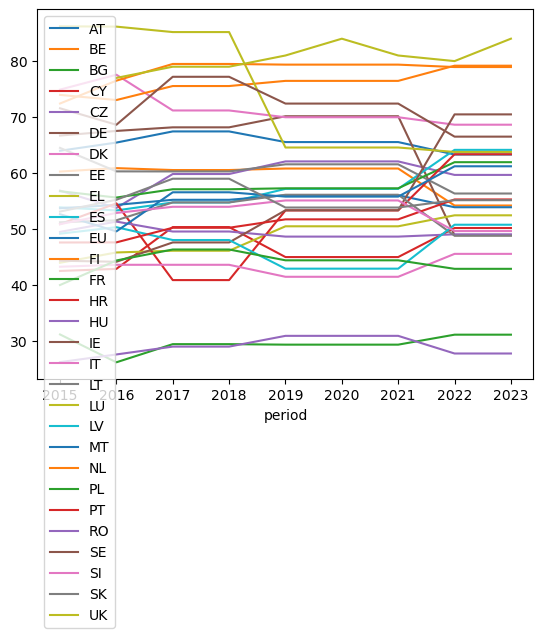

In [421]:
merged_df.groupby('country')['At least basic digital skills'].plot(legend=True)
plt.show()

In [422]:
temp = ['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States of America',
 'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia', 'Argentina',
 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
 'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway', 'Greenland',
 'Fr. S. Antarctic Lands', 'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico',
 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica',
 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
 'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico', 'Jamaica', 'Cuba',
 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin',
 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana' "Côte d'Ivoire" 'Guinea',
 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso',
 'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi',
 'Mozambique', 'eSwatini', 'Angola', 'Burundi', 'Israel', 'Lebanon',
 'Madagascar', 'Palestine', 'Gambia', 'Tunisia', 'Algeria', 'Jordan',
 'United Arab Emirates', 'Qatar', 'Kuwait', 'Iraq', 'Oman', 'Vanuatu',
 'Cambodia', 'Thailand', 'Laos', 'Myanmar', 'Vietnam', 'North Korea',
 'South Korea', 'Mongolia', 'India', 'Bangladesh', 'Bhutan', 'Nepal', 'Pakistan',
 'Afghanistan', 'Tajikistan', 'Kyrgyzstan', 'Turkmenistan', 'Iran', 'Syria',
 'Armenia', 'Sweden', 'Belarus', 'Ukraine', 'Poland', 'Austria', 'Hungary',
 'Moldova', 'Romania', 'Lithuania', 'Latvia', 'Estonia', 'Germany', 'Bulgaria',
 'Greece', 'Turkey', 'Albania', 'Croatia', 'Switzerland', 'Luxembourg',
 'Belgium', 'Netherlands', 'Portugal', 'Spain', 'Ireland', 'New Caledonia',
 'Solomon Is.', 'New Zealand', 'Australia', 'Sri Lanka', 'China', 'Taiwan',
 'Italy', 'Denmark', 'United Kingdom', 'Iceland', 'Azerbaijan', 'Georgia',
 'Philippines', 'Malaysia', 'Brunei', 'Slovenia', 'Finland', 'Slovakia',
 'Czechia', 'Eritrea', 'Japan', 'Paraguay', 'Yemen', 'Saudi Arabia',
 'Antarctica', 'N. Cyprus', 'Cyprus', 'Morocco', 'Egypt', 'Libya', 'Ethiopia',
 'Djibouti', 'Somaliland', 'Uganda', 'Rwanda', 'Bosnia and Herz.',
 'North Macedonia', 'Serbia', 'Montenegro', 'Kosovo', 'Trinidad and Tobago',
 'S. Sudan']

temp.sort()
temp

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 "GhanaCôte d'IvoireGuinea",
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamai

In [423]:
country_codes = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'DE': 'Germany',
    'EL': 'Greece',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden',
    'UK': 'United Kingdom',
    'EU': 'European Union'
}

iso_codes = iso_codes = {
    'AT': 'AUT',
    'BE': 'BEL',
    'BG': 'BGR',
    'HR': 'HRV',
    'CY': 'CYP',
    'CZ': 'CZE',
    'DK': 'DNK',
    'EE': 'EST',
    'FI': 'FIN',
    'FR': 'FRA',
    'DE': 'DEU',
    'EL': 'GRC',
    'HU': 'HUN',
    'IE': 'IRL',
    'IT': 'ITA',
    'LV': 'LVA',
    'LT': 'LTU',
    'LU': 'LUX',
    'MT': 'MLT',
    'NL': 'NLD',
    'PL': 'POL',
    'PT': 'PRT',
    'RO': 'ROU',
    'SK': 'SVK',
    'SI': 'SVN',
    'ES': 'ESP',
    'SE': 'SWE',
    'UK': 'GBR',
    'EU': 'EU'
}

merged_df['country_name'] = merged_df['country'].apply(lambda x: country_codes[x])
merged_df['ISO'] = merged_df['country'].apply(lambda x: iso_codes[x]) 

In [424]:
from datetime import datetime

gvt_df = pd.read_csv('./data/OxCGRT_simplified_v1.csv')
gvt_df = gvt_df[['CountryName','CountryCode','Date','StringencyIndex_Average']]
gvt_df['Date'] = gvt_df['Date'].apply(lambda x: datetime.strptime(str(x),"%Y%m%d"))
gvt_df.set_index('Date',inplace=True)

C:\Users\Andre\AppData\Local\Temp\ipykernel_16596\2654395563.py:3: DtypeWarning: Columns (2,3,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  gvt_df = pd.read_csv('./data/OxCGRT_simplified_v1.csv')


In [425]:
gvt_df = pd.DataFrame(gvt_df.groupby('CountryCode')['StringencyIndex_Average'].resample('1y').mean())
gvt_df.reset_index(inplace=True)

In [426]:
gvt_df['Date'] = gvt_df['Date'].apply(lambda x: int(x.year))

In [427]:
merged_df.reset_index(inplace=True)
merged_df.merge(gvt_df,right_on=['CountryCode','Date'],left_on=['ISO','period'],how='left')

,period,country,At least basic digital skills,Above basic digital skills,Broadband coverage,Broadband take-up,country_name,ISO,CountryCode,Date,StringencyIndex_Average
0,2015,MT,52.68,34.54,NaN,NaN,Malta,MLT,NaN,NaN,NaN
1,2015,SE,71.58,35.24,NaN,NaN,Sweden,SWE,NaN,NaN,NaN
2,2015,RO,26.28,8.97,NaN,NaN,Romania,ROU,NaN,NaN,NaN
3,2015,PT,47.63,27.88,NaN,NaN,Portugal,PRT,NaN,NaN,NaN
4,2015,PL,40.04,15.07,NaN,NaN,Poland,POL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
256,2019,UK,81.00,NaN,95.0,54.0,United Kingdom,GBR,NaN,NaN,NaN
257,2020,UK,84.00,NaN,96.0,58.0,United Kingdom,GBR,GBR,2020.0,56.375290
258,2021,UK,81.00,NaN,96.0,66.0,United Kingdom,GBR,GBR,2021.0,54.922137
259,2022,UK,80.00,NaN,97.0,71.0,United Kingdom,GBR,GBR,2022.0,12.868088


In [428]:
merged_df = merged_df.merge(gvt_df,right_on=['CountryCode','Date'],left_on=['ISO','period'],how='left')
merged_df.drop(['CountryCode'],axis=1,inplace=True)

In [429]:
merged_df.head()

,period,country,At least basic digital skills,Above basic digital skills,Broadband coverage,Broadband take-up,country_name,ISO,Date,StringencyIndex_Average
0,2015,MT,52.68,34.54,NaN,NaN,Malta,MLT,NaN,NaN
1,2015,SE,71.58,35.24,NaN,NaN,Sweden,SWE,NaN,NaN
2,2015,RO,26.28,8.97,NaN,NaN,Romania,ROU,NaN,NaN
3,2015,PT,47.63,27.88,NaN,NaN,Portugal,PRT,NaN,NaN
4,2015,PL,40.04,15.07,NaN,NaN,Poland,POL,NaN,NaN


In [430]:
merged_df.to_csv('digital_skills.csv')

C:\Users\Andre\AppData\Local\Temp\ipykernel_16596\393584941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offset_df['period'] = offset_df['period'] - 3


In [463]:
def reg_data(df):

    offset_df = df[['period','At least basic digital skills','ISO']]
    offset_df['offset_period'] = offset_df['period'] - 4
    offset_df = offset_df.merge(offset_df, left_on=['period','ISO'], right_on=['offset_period','ISO'],how='left',suffixes=('',' (offset)'))
    offset_df['change in basic digital skills'] = offset_df['At least basic digital skills (offset)'] - offset_df['At least basic digital skills']
    offset_df = offset_df[offset_df['period'] == 2019].sort_values('ISO')

    grouped_df = pd.DataFrame(merged_df.groupby('ISO')['StringencyIndex_Average'].mean())

    out_df = grouped_df.merge(offset_df, left_on=['ISO'],right_on=['ISO'])
    out_df = out_df[['ISO','StringencyIndex_Average','change in basic digital skills']]
    out_df.columns = ['ISO', 'Average Lockdown Stringency', 'Change in Basic Digital Skills']

    return out_df


out_df = reg_data(merged_df)


C:\Users\Andre\AppData\Local\Temp\ipykernel_16596\3224847161.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [464]:
import plotly.express as px

fig = px.scatter(out_df, y='Change in Basic Digital Skills',x='Average Lockdown Stringency',trendline='ols',trendline_color_override='grey')

In [465]:
model = px.get_trendline_results(fig)
results = model.iloc[0]["px_fit_results"]
alpha = results.params[0]
beta = results.params[1]
p_beta = results.pvalues[1]
r_squared = results.rsquared

In [466]:
print(alpha, beta, p_beta, r_squared)

-2.224338238263855 0.06585894813553399 0.7969461288009009 0.002592359717962789
